In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# raw data
stock = yf.Ticker("TSLA")
option_dates = stock.options

# empty dataframe to fill with processed data
df = pd.DataFrame(columns = ['strike', 'lastPrice', 'months_left'])

In [4]:
# iterate over each date, add its data to the df

for date in option_dates:
    
    daily = stock.option_chain(date)
    daily_chain = daily.puts # data for calls is stored separately
    
    daily_chain['months_left'] = (int(date[0:4])-2021)*12 + int(date[5:7]) + int(date[8:11])/30  # convert expiry date to a number for graphing
                                                                                                 # (ie, number of days from jan 1 2021)
    daily_chain = daily_chain[['strike', 'lastPrice', 'months_left']] # drop unused columns
    
    df = df.append(daily_chain)

In [5]:
df # visually check processing

,strike,lastPrice,months_left
0,100.0,0.01,9.100000
1,200.0,0.01,9.100000
2,300.0,0.01,9.100000
3,400.0,0.04,9.100000
4,410.0,0.05,9.100000
...,...,...,...
37,1250.0,585.50,30.533333
38,1300.0,628.11,30.533333
39,1350.0,673.44,30.533333
40,1400.0,723.00,30.533333


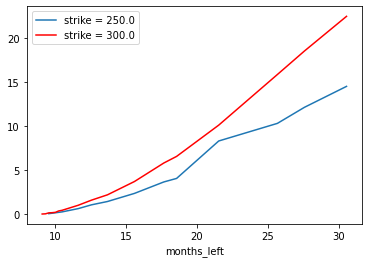

In [13]:
# plot option-cost/expiry-time for two different strike prices

ax = df.query('strike == 250.0').plot(x='months_left', y = 'lastPrice')
df.query('strike == 300.0').plot(x='months_left', y = 'lastPrice', color = 'red', ax = ax)

ax.legend(["strike = 250.0", "strike = 300.0"])